In [1]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [73]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [15]:
# create engine to hawaii.sqlite
dataBasePath = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{dataBasePath}")
conn = engine.connect()


In [16]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# View all of the classes that automap found
 Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [19]:
 # Create our session (link) from Python to the DB
session = Session(engine)

In [34]:
# Find the most recent date in the data set. 
lastDate = pd.read_sql("SELECT * FROM measurement WHERE id=(SELECT max(id) FROM measurement)", conn)
lastDate

,id,station,date,prcp,tobs
0,19550,USC00516128,2017-08-23,0.45,76.0


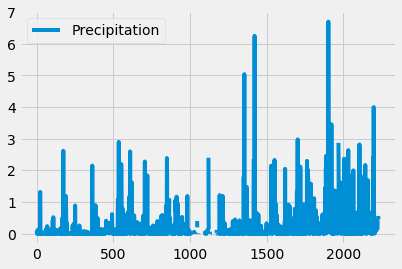

In [112]:
 # Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the date and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23")
date = [result[0] for result in results]
prcp = [result[1] for result in results]

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(results, columns=["Date","Precipitation"])

# Sort the dataframe by date
precip_df.sort_values(by=["Date"],ascending=True)
precip_df.reset_index(drop=True, inplace=True)
precip_df

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x="date",y)

In [72]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [80]:
 # Design a query to calculate the total number stations in the dataset
totalStations = session.query(station.id).count()
totalStations

9

In [89]:
 # Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostActive = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
mostActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [106]:
 # Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station,
      func.max(measurement.tobs),
      func.min(measurement.tobs),
      func.avg(measurement.tobs)]
active = session.query(*sel).filter(measurement.station == 'USC00519281')
df = pd.DataFrame(active, columns=["Most Active Station","Max Temp","Min Temp","Average Temp"])
df

,Most Active Station,Max Temp,Min Temp,Average Temp
0,USC00519281,85.0,54.0,71.663781


In [115]:
 # Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281')\
.order_by(measurement.date).desc().all()

AttributeError: 'Query' object has no attribute 'desc'

In [ ]:
 # Close Session
#session.close()